In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
pip install scikit-learn-extra

     |████████████████████████████████| 624kB 16.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp37-cp37m-linux_x86_64.whl size=339920 sha256=5fcce85d3c602d61edc63f7031d19dd6eadc4427c86bbcf862f72f14b79fd655
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [4]:
 from sklearn_extra.cluster import KMedoids

In [5]:
data_acp["average_word_sentence"] = data_acp["average_word_sentence"].fillna(0)
kmed = KMedoids(n_clusters=9, init='k-medoids++',metric='cosine',  random_state=0).fit(bow_g3)
kmed_pred = kmed.predict(bow_g3)
graph_3d(bow_g3, kmeans_pred)
print(pd.Series(kmed_pred).value_counts())

NameError: ignored

In [6]:
def graph_3d(data: pd.DataFrame, prediction: pd.Series, name: list=None, axes: tuple=(0,1,2), opacity: list=None):
    """Documentation
    Parameters:
        data : the data that will be show on the plot
        prediction : the prediction that will be used to make distinction bewteen the differents class on the plot
        name : colunms names
        axes : axes of pca to display points
        opacity : the transparency of the points on the graph
    """

    if opacity is None:
        opacity: list = [1 for i in range(len(set(prediction)))]
    
    if name is None:
        name: list = {i:str(val) for i, val in zip(range(len(set(prediction))), set(prediction))}

    sc: StandardScaler = StandardScaler()
    X: np.ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=10)
    # pca = TSNE(n_components=3)
    X: np.ndarray = pca.fit_transform(X)

    data_plot: pd.DataFrame = pd.DataFrame(X)
    data_plot["prediction"] = prediction
    # data_plot["prediction"] = prediction.replace([-1,1], name)

    data: list = []
    for i, val in zip(range(len(set(prediction))), set(prediction)):
        data_semi_plot: pd.DataFrame = data_plot[data_plot["prediction"] == val]
        data.append(go.Scatter3d(x=data_semi_plot[axes[0]], y=data_semi_plot[axes[1]], z=data_semi_plot[axes[2]], name=name[val], mode='markers',marker=dict(size=6), opacity=opacity[i]))

    fig: go.Figure = go.Figure(data)
    fig.show()




In [7]:
def plot_top_words(model: LDA, feature_names: list, n_top_words: int, title: str):
    """Documentation
    Parameters:
        model: LDA
        feature_names: a list of words which are present in the model
        n_top_words: number of words to display
        title: title of the plot
    
    """
    fig, axes = plt.subplots(3, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
    
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30, 'color':'white'})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20, color='white')
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40, color='white')

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [8]:
data_normal = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data.json")

bow_g3: pd.DataFrame = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/g3_BOW_v1.json")
bow_g3.drop(["art_id", "art_content_clean_without_lem"], axis=1, inplace=True)

glove_v1: pd.DataFrame = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/GloVe_v1.json")
glove_v1.drop(["art_id", "art_content_clean_without_lem", "spacy_vector"], axis=1, inplace=True)

In [9]:
len(bow_g3)

7533

In [10]:
lda: LDA = LDA(12, random_state=0).fit(bow_g3)

In [11]:
vect = lda.transform(bow_g3)
print(vect)

[[3.33343312e-03 3.33344658e-03 3.33348143e-03 ... 3.33339779e-03
  3.33341700e-03 3.33347035e-03]
 [5.43441804e-01 1.02886628e-03 1.02884130e-03 ... 1.02882932e-03
  1.02886372e-03 1.02886221e-03]
 [1.25507306e-04 6.05246999e-01 1.25506084e-04 ... 1.25505726e-04
  1.25506835e-04 1.25508347e-04]
 ...
 [3.23197316e-02 4.31568705e-05 1.95388953e-01 ... 4.31574402e-05
  1.34073823e-01 4.31570122e-05]
 [5.08151658e-04 5.08149570e-04 5.08144440e-04 ... 5.08142209e-04
  1.51672822e-01 5.08146088e-04]
 [1.59649901e-04 1.59649082e-04 1.59648484e-04 ... 1.59647583e-04
  3.89793727e-01 1.59649103e-04]]


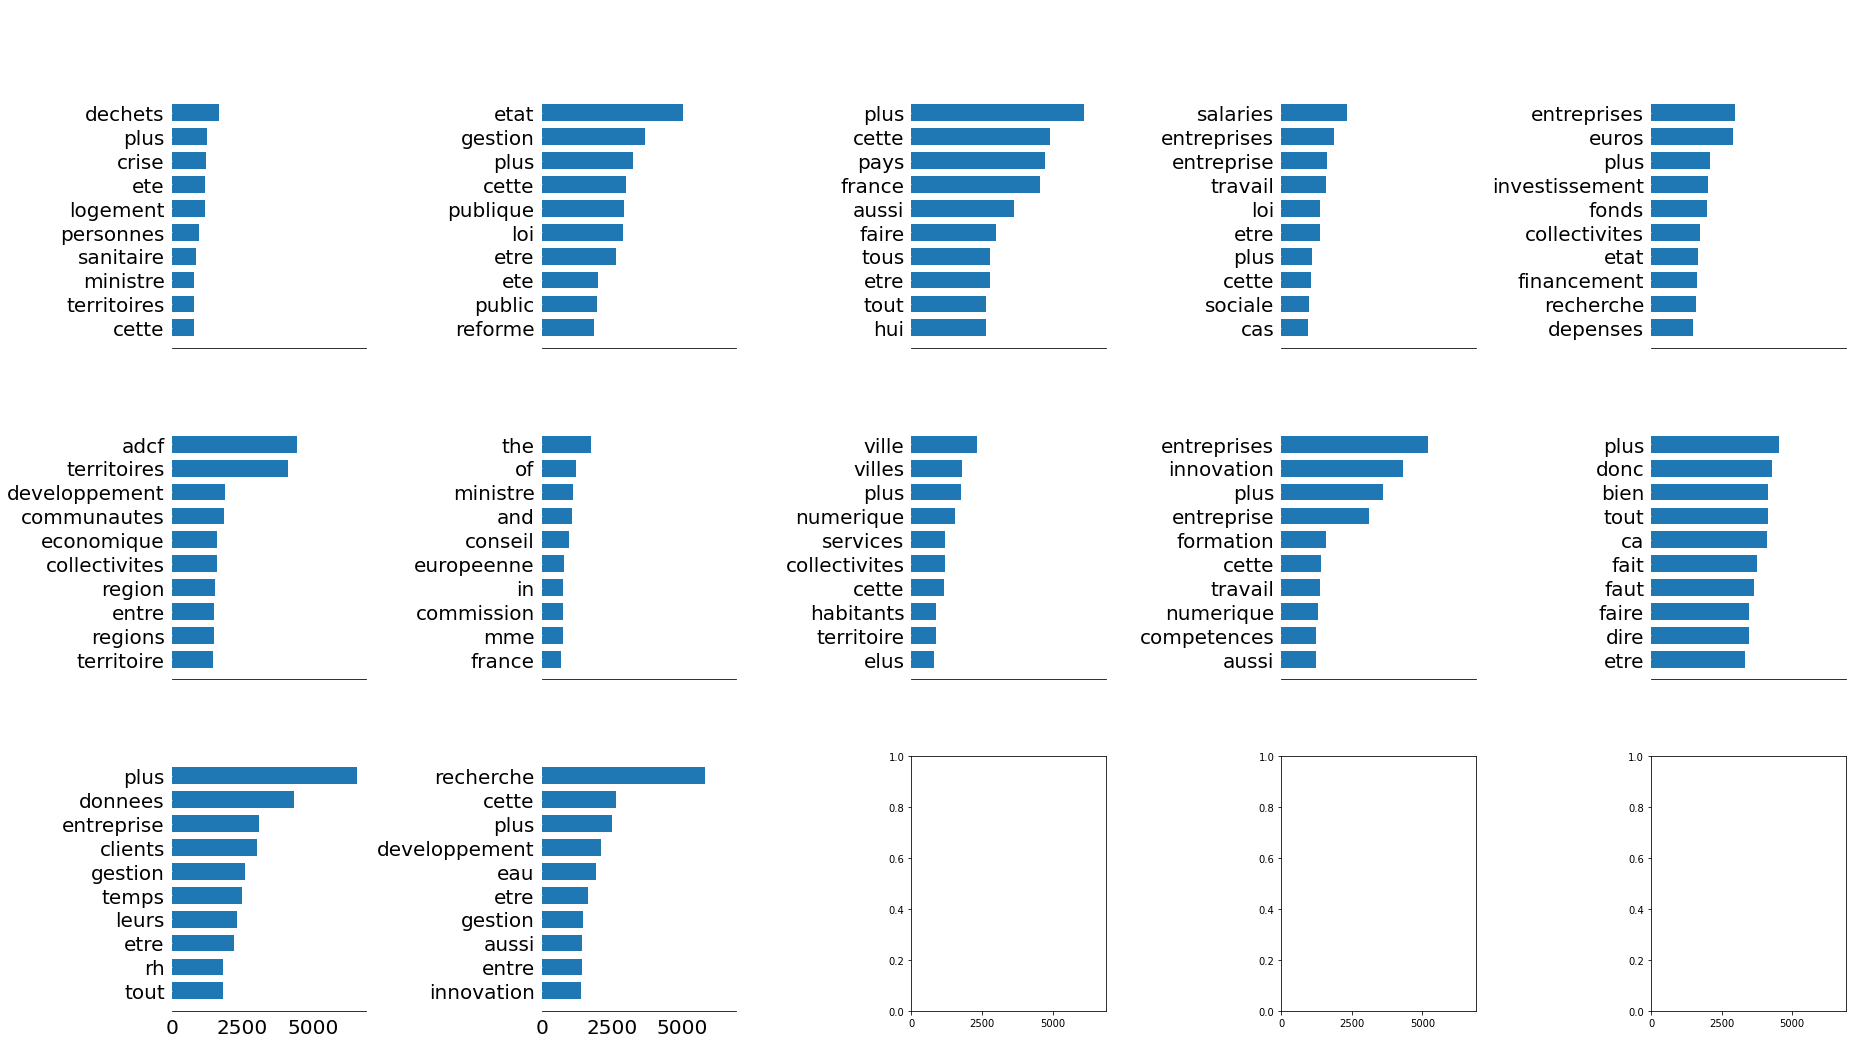

In [12]:
n_top_words = 10
plot_top_words(lda, bow_g3.columns, n_top_words, 'Topics in LDA model')

In [13]:
nmf = NMF(n_components=12, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(bow_g3)

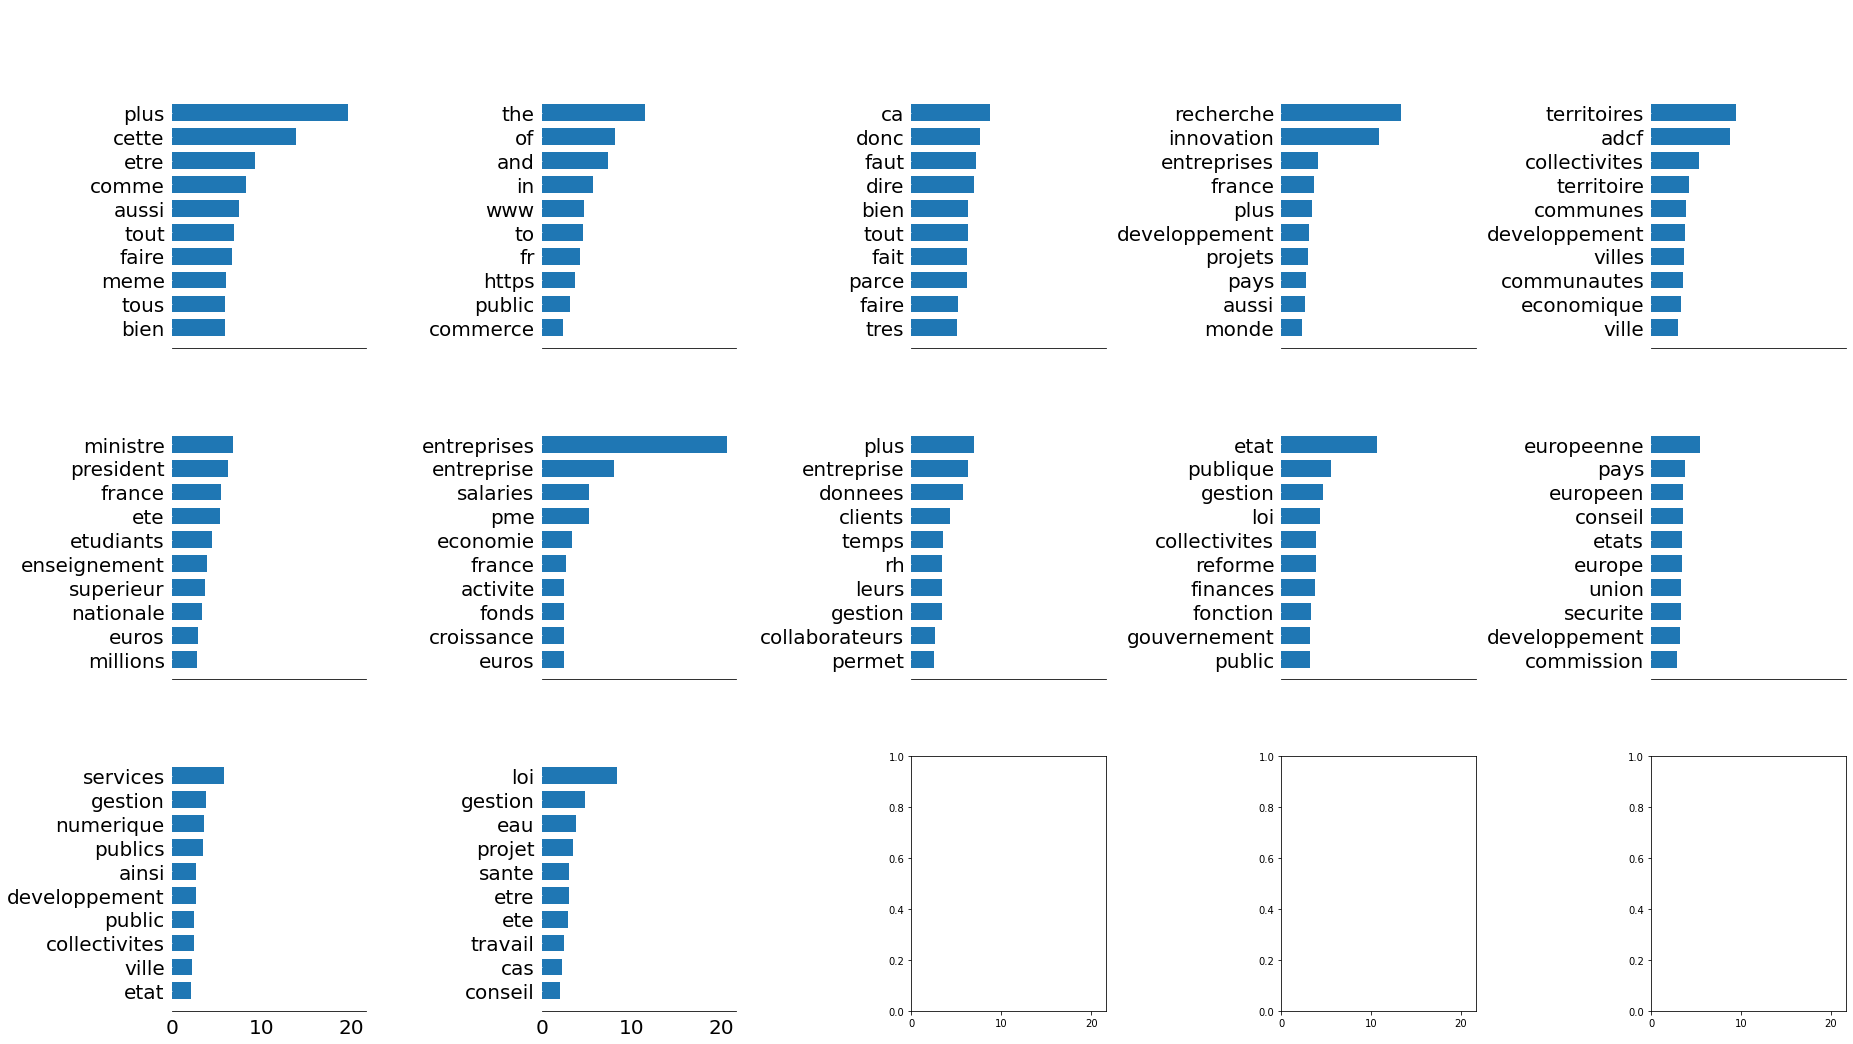

In [14]:
n_top_words = 10
plot_top_words(nmf, bow_g3.columns, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [ ]:
transform:np.ndarray = lda.transform(bow_g3)

In [ ]:
transform[0]

array([0.00333343, 0.00333345, 0.00333348, 0.00333352, 0.0033334 ,
       0.6665545 , 0.00333354, 0.30011092, 0.00333347, 0.0033334 ,
       0.00333342, 0.00333347])

In [ ]:
len(data_normal)

12261

In [15]:
dataClean = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/df_final_clean.json")


titles=["vide"]*7533
tags=[[]]*7533
index=0
for i in dataClean['art_id']:
  titles[index]=data_normal.loc[data_normal['art_id']==i]['art_title'].values[0]
  test_list=data_normal.loc[data_normal['art_id']==i]['art_tag'].values[0]
  if test_list==None:
    tags[index]=[]
  elif test_list[0]=='[':
      tags[index]=eval(test_list)
  else:
    if "Not Found"==test_list:
      tags[index]=[]
    else:
      tags[index]=[test_list]
  index=index+1
for i in range(len(tags)):
  if tags[i]==['']:
    tags[i]=[]
  for j in range(len(tags[i])):
    if tags[i][j][0]=='#':
      tags[i][j]=tags[i][j][1:]

%load_ext google.colab.data_table
df_clean = pd.DataFrame({'art_id'	:dataClean['art_id'],
                         'art_content_prepd': dataClean['art_content_prepd'],
                         'art_title':titles,
                         'art_tag':tags})
print(len(df_clean))
df_clean.head(2)

7533


,art_id,art_content_prepd,art_title,art_tag
1,1,fncdg andcdg publie septembre eme edition pano...,9ème édition du Panorama de l’emploi territorial,[]
2,2,malgre levee mesure confinement mai plupart me...,ACTUALITÉS FNCDG / COVID19,[]


In [16]:
df_clean.art_tag = df_clean.art_tag.apply(lambda y: np.nan if len(y)==0 else y)
df_clean.dropna(subset=['art_tag'], inplace=True)
# df_clean_tag.head(5)

In [17]:
df_clean.loc[1405, "art_tag"]

['Société',
 'Education - Recherche',
 'Politique de la recherche',
 'Culture - Médias',
 'Musée']

In [18]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
punct = set(string.punctuation)
stopwords = stopwords.words("french")
stopwords = set(stopwords)
lm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
def sentense2cleanTokens(text):
    text = ''.join(char.lower() for char in text if char not in punct)
    tokens = re.split('\W+', text)
    text = [lm.lemmatize(word) for word in tokens if word not in stopwords]
    text = ' '.join(i for i in text)
    return text

# cleantitrestrain=[sentense2cleanTokens(x) for x in X_train_content]

# [[sentense2cleanTokens(tag) for tag in tags] for tags in df_clean_tag["art_tag"]]

In [23]:
dic = {}
for i, row in df_clean.iterrows():
    dic[i] = [sentense2cleanTokens(tag) for tag in row["art_tag"]]

In [24]:
df_clean = pd.DataFrame({'art_id'	:df_clean['art_id'],
                         'art_content_prepd': df_clean['art_content_prepd'],
                         'art_title':df_clean["art_title"],
                         'art_tag':pd.Series(dic)})

In [25]:
all_tags = set()
for tags in df_clean["art_tag"]:
    all_tags = all_tags.union(set([tag for tag in tags]))
all_tags

{'',
 'industrie automobile',
 'science numérique i a',
 'axible',
 'csp',
 'politique lenvironnement',
 'lovebox',
 'patrimoine naturel',
 'retours',
 'avion',
 'organisme recherche',
 'playmoweb',
 'capteurs',
 'economie',
 'tissu connecté',
 'solidarité',
 'géolocalisation',
 'gta',
 'anger french tech',
 'elu',
 'andcdg',
 'loisir',
 'laboratoire',
 'secteur industriel',
 'république démocratique congo',
 'electronique',
 'smart cité',
 'engie fab',
 'article',
 'equipement collectif',
 'adn ouest',
 'écosystème digital',
 'innover',
 'centreville',
 'patrimoine culturel',
 'union économique monétaire',
 'idées',
 'banque finance',
 'datacenter',
 'greentech',
 'drone',
 'digitalworkplace',
 'acpusi',
 'loisirs',
 'iot',
 'attaques',
 'livre',
 'vacances',
 'equipement médical',
 'enseignant',
 'école',
 'suède',
 'google',
 'italie',
 'tic',
 'impression 3d',
 'smart waste management',
 'hewlett packard',
 'digital',
 'ville internet',
 'intercommunalité',
 'juridiction',
 'parten

In [26]:
bow_tags: pd.DataFrame = pd.DataFrame(columns=["art_id"]+list(all_tags))
bow_tags.loc[len(bow_tags), "art_id"] = 5


bow_tags.head(3)

,art_id,,industrie automobile,science numérique i a,axible,csp,politique lenvironnement,lovebox,patrimoine naturel,retours,avion,organisme recherche,playmoweb,capteurs,economie,tissu connecté,solidarité,géolocalisation,gta,anger french tech,elu,andcdg,loisir,laboratoire,secteur industriel,république démocratique congo,electronique,smart cité,engie fab,article,equipement collectif,adn ouest,écosystème digital,innover,centreville,patrimoine culturel,union économique monétaire,idées,banque finance,datacenter,...,gouvernement,pouvoir législatif,filière numérique,coopération,ville ingénieuse,juridique,fitness,science,communication,5g,référence utilisateur,enseignement professionnel,application mobile,filière,vente directe,anger frenchtech,tramway,workshop,situation économique,robotique,espace,logement social hlm,enseignement secondaire,politique étrangère,filoue,infrastructure,débat,conseil,homme moderne,valorisation,préfecture,fonction publique,collective,médical,loi élan,électronique,gélolocalisation,artisanat,droit,projets
0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#print(len(all_tags))
bow_tags: pd.DataFrame = pd.DataFrame(columns=list(all_tags))
for i, row in df_clean.iterrows():
    bow_tags.loc[row["art_id"]] = pd.Series([0] * len(all_tags), index=bow_tags.columns)
    for tag in row["art_tag"]:
        bow_tags.loc[row["art_id"], tag] += 1
bow_tags.drop([""], axis=1, inplace=True)

In [28]:
bow_tags.head()

,industrie automobile,science numérique i a,axible,csp,politique lenvironnement,lovebox,patrimoine naturel,retours,avion,organisme recherche,playmoweb,capteurs,economie,tissu connecté,solidarité,géolocalisation,gta,anger french tech,elu,andcdg,loisir,laboratoire,secteur industriel,république démocratique congo,electronique,smart cité,engie fab,article,equipement collectif,adn ouest,écosystème digital,innover,centreville,patrimoine culturel,union économique monétaire,idées,banque finance,datacenter,greentech,drone,...,gouvernement,pouvoir législatif,filière numérique,coopération,ville ingénieuse,juridique,fitness,science,communication,5g,référence utilisateur,enseignement professionnel,application mobile,filière,vente directe,anger frenchtech,tramway,workshop,situation économique,robotique,espace,logement social hlm,enseignement secondaire,politique étrangère,filoue,infrastructure,débat,conseil,homme moderne,valorisation,préfecture,fonction publique,collective,médical,loi élan,électronique,gélolocalisation,artisanat,droit,projets
74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lda: LDA = LDA(9, random_state=0).fit(bow_tags)
vects = lda.transform(bow_tags)

In [ ]:
vects[0]

array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
       0.05555556, 0.05555556, 0.55555555, 0.05555556])

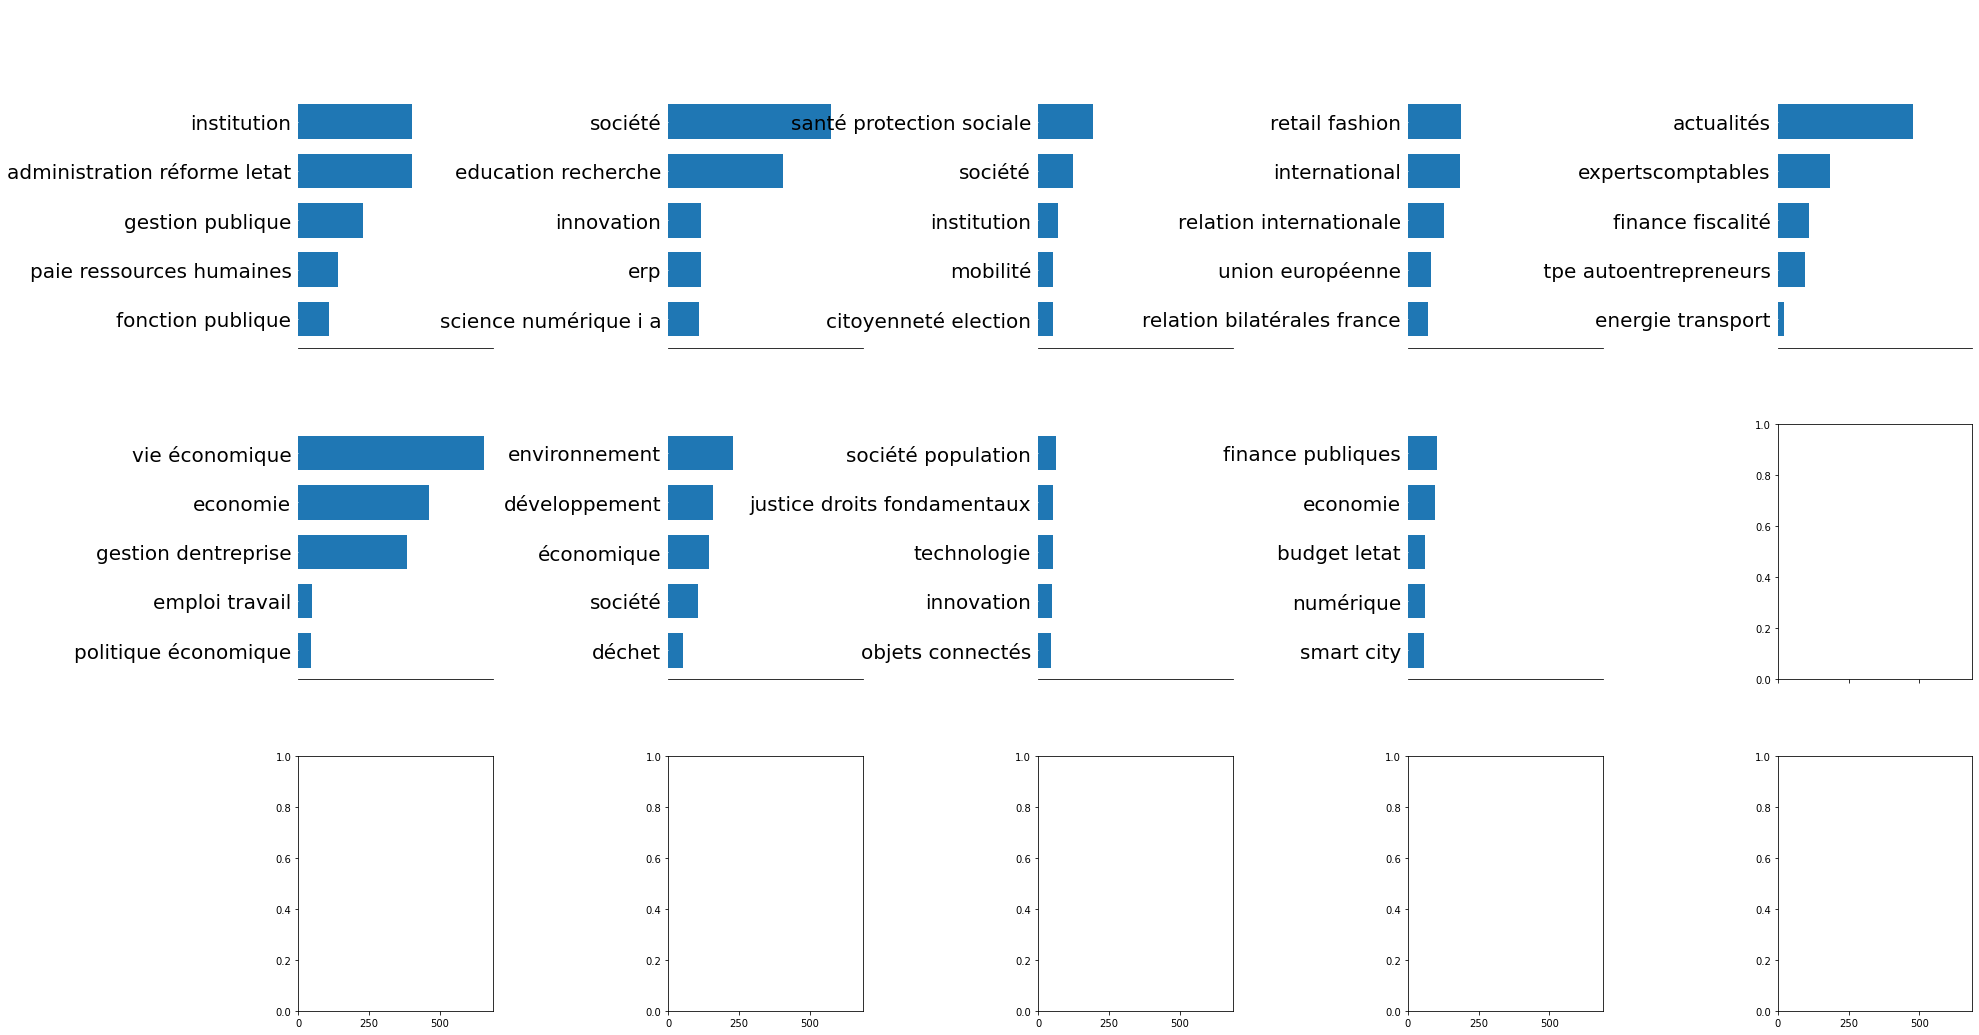

In [ ]:
n_top_words = 5
plot_top_words(lda, bow_tags.columns, n_top_words,
               'Topics in LDA model with tags')

In [ ]:
def lda_clustering(data: pd.DataFrame, n_cluster: int) -> pd.DataFrame:
    """Documentation
    Parameters:
        data: word embedding (index must be art_id) 
        n_cluster: number of cluster to find
    
    Out:
        cluster: the dataFrame contains art_id, cluster_id, cluster_name
    """
    
    # Sets up LDA  
    lda: LDA = LDA(n_cluster, random_state=0).fit(data)
    vects: np.ndarray = lda.transform(data)

    # Recovers the name of clusters
    cluster_names: dict = {}
    for j in range(n_cluster):
        cluster_names[j] = data.columns[max(zip(range(len(lda.components_[j])), lda.components_[j]), key=lambda x: x[1])[0]]
    
    # Links art_id to cluster_id and cluster_name
    cluster : pd.DataFrame = pd.DataFrame(columns=["art_id", "cluster_id", "cluster_name"])
    for art_id, vect in zip(data.index, vects):
        cluster_id: int = max(zip(range(len(vect)), vect), key=lambda x: x[1])[0]
        cluster.loc[art_id] = [art_id, cluster_id, cluster_names[cluster_id]]
    
    return cluster
    

In [ ]:
test = lda_clustering(bow_tags, 9)

In [ ]:
test.sample(10)

,art_id,cluster_id,cluster_name
4264,4264,4,actualités
979,979,5,vie économique
9859,9859,0,institution
9903,9903,6,environnement
4446,4446,0,institution
4262,4262,4,actualités
9305,9305,2,santé protection sociale
6243,6243,8,finance publiques
7061,7061,8,finance publiques
1767,1767,6,environnement


In [ ]:
cluster_names: dict = {}
for j in range(9):
    cluster_names[j] = bow_tags.columns[max(zip(range(len(lda.components_[j])), lda.components_[j]), key=lambda x: x[1])[0]]

print(cluster_names)

cluster = pd.DataFrame(columns=["art_id", "cluster_id", "cluster_name"])
for art_id, vect in zip(bow_tags.index, vects):
    cluster_id = max(zip(range(len(vect)), vect), key=lambda x: x[1])[0]
    cluster.loc[art_id] = [art_id, cluster_id, cluster_names[cluster_id]]

cluster.head()

In [ ]:
cluster.sample(10)

,art_id,cluster_id,cluster_name
8479,8479,3,retail fashion
3326,3326,8,finance publiques
8357,8357,0,institution
2428,2428,4,actualités
8629,8629,0,institution
6411,6411,8,finance publiques
9066,9066,1,société
4043,4043,1,société
1574,1574,8,finance publiques
7346,7346,6,environnement


In [ ]:
len(set(bow_g3.index) - set(bow_tags.index))

2277

In [ ]:
len(bow_g3.drop(index=list(set(bow_g3.index) - set(bow_tags.index))))

5256

In [ ]:
graph_3d(bow_g3.drop(index=list(set(bow_g3.index) - set(bow_tags.index))), lda_clustering(bow_tags, 9)["cluster_id"])

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(9, random_state=0).fit_predict(bow_tags)

In [31]:
graph_3d(bow_g3.drop(index=list(set(bow_g3.index) - set(bow_tags.index))), kmeans)

In [35]:
bow_g3.drop(index=list(set(bow_g3.index) - set(bow_tags.index)))

,abonnement,abord,aborde,aborder,abordes,aboutir,abri,absence,absolue,absolument,academie,academique,academiques,acceder,accelerateur,acceleration,accelere,acceleree,accelerer,accent,accentuer,acceptable,accepte,accepter,acces,accessibilite,accessible,accessibles,accident,accidents,accompagnant,accompagne,accompagnee,accompagnement,accompagnent,accompagner,accompagnes,accompli,accomplir,accord,...,volets,volontaire,volontaires,volontariste,volonte,volume,volumes,vont,vote,votee,voter,votes,voudrais,voulais,voulez,vouloir,voulons,voulu,voyage,voyez,voyons,vrai,vraie,vraies,vraiment,vrais,vu,vue,vues,vulnerables,web,week,www,xxie,yeux,yves,zero,zone,zones,œuvre
74,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,18,0,0,0,0,0,0,0,0,10
10000,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
10001,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,7,0,0,0,0,0,0,0,0,0,3
10002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3


In [34]:
kmeans = KMeans(11, random_state=0).fit(bow_g3)
kmeans_pred = kmeans.predict(bow_g3)
graph_3d(bow_g3, kmeans_pred)

In [44]:
opacity: list = [1 for i in range(len(set(kmeans_pred)))]
name: list = {i:str(val) for i, val in zip(range(len(set(kmeans_pred))), set(kmeans_pred))}

    # data_plot["prediction"] = prediction.replace([-1,1], name)
sc: StandardScaler = StandardScaler()
X: np.ndarray = sc.fit_transform(bow_g3)

pca: PCA = PCA(n_components=2)
X: np.ndarray = pca.fit_transform(X)

data_plot: pd.DataFrame = pd.DataFrame(X)
data_plot["prediction"] = kmeans_pred
# data_plot["prediction"] = prediction.replace([-1,1], name)

data: list = []
for i, val in zip(range(len(set(kmeans_pred))), set(kmeans_pred)):
  data_semi_plot: pd.DataFrame = data_plot[data_plot["prediction"] == val]
  data.append(go.Scatter3d(x=data_semi_plot[0], y=data_semi_plot[1], z=data_semi_plot[2], name=name[val], mode='markers',marker=dict(size=6), opacity=opacity[i]))

fig: go.Figure = go.Figure(data)
fig.show()

KeyError: ignored

In [ ]:
word_centers = []
for center in kmeans.cluster_centers_:
    word_centers.append([(bow_g3.columns[i[0]]) for i in sorted(zip(range(len(center)), center), key=lambda x: -x[1])[:5]])
word_centers # Très moche

[['plus', 'cette', 'gestion', 'entreprises', 'etat'],
 ['recherche', 'innovation', 'plus', 'entreprises', 'cette'],
 ['the', 'of', 'and', 'in', 'to'],
 ['plus', 'cette', 'etre', 'aussi', 'faire'],
 ['adcf', 'territoires', 'plus', 'entreprises', 'cette'],
 ['plus', 'cette', 'etat', 'entreprises', 'etre'],
 ['plus', 'cette', 'etre', 'aussi', 'etat'],
 ['plus', 'cette', 'etre', 'entreprises', 'entreprise'],
 ['plus', 'tout', 'cette', 'bien', 'etre'],
 ['masques', 'ministre', 'mme', 'ete', 'plus'],
 ['frederique', 'ca', 'donc', 'plus', 'jean']]

In [ ]:
# kmeans_pred
df = bow_g3.copy()
df["pred"] = kmeans_pred

In [ ]:
def dst(v1, v2):
    return np.sqrt(sum((v1 - v2)**2))

dst(np.array([1,0,0]), np.array([-1,0,0]))

2.0

In [ ]:
import tqdm
from scipy.spatial import distance

In [ ]:
article_centers = []
for i in range(len(kmeans.cluster_centers_)):
    article_id = df[df["pred"] == i].index
    print(len(article_id), i)
    article_centers.append([(id, distance.euclidean(np.array(df.drop(["pred"], axis=1).loc[id]), kmeans.cluster_centers_[i])) for id in tqdm.notebook.tqdm(article_id)])


4487 0



171 1



4 2



86 3



143 4



3 5



658 6



1869 7



21 8



2 9



89 10


In [ ]:
sorted(article_centers[5], key=lambda x: x[1])[:5]

[(8630, 53.081892006400864),
 (8849, 53.92208830159762),
 (1037, 54.11967694741216),
 (7315, 54.12586256226908),
 (970, 54.32214976076862)]

In [ ]:
best_tag = []
for k in range(len(kmeans.cluster_centers_)):
    tags = dict(zip(list(all_tags), [0]*len(all_tags)))
    for i, val in sorted(article_centers[k], key=lambda x: x[1])[:100]:
        try:
            for i in df_clean.loc[i, "art_tag"]:
                tags[i] += 1
        except:
            pass
    best_tag.append(sorted(tags.items(), key=lambda x: -x[1])[:10])

In [ ]:
best_tag

[[('actualités', 9),
  ('vie économique', 6),
  ('gestion dentreprise', 5),
  ('environnement', 4),
  ('développement', 3),
  ('déchet', 3),
  ('économique', 3),
  ('', 2),
  ('acteurs territoires', 2),
  ('numérique', 1)],
 [('société', 69),
  ('education recherche', 61),
  ('recherche développement', 21),
  ('innovation', 17),
  ('politique recherche', 15),
  ('economie', 14),
  ('vie économique', 13),
  ('enseignement supérieur', 7),
  ('science numérique i a', 6),
  ('compétitivité', 4)],
 [('', 0),
  ('politique lemploi', 0),
  ('otan', 0),
  ('expérience', 0),
  ('accompagnement', 0),
  ('technique agricole', 0),
  ('ap connect', 0),
  ('pouvoirs', 0),
  ('développement', 0),
  ('relation administration usager', 0)],
 [('société', 28),
  ('institution', 19),
  ('economie', 17),
  ('international', 16),
  ('vie économique', 15),
  ('relation internationale', 15),
  ('education recherche', 11),
  ('administration réforme letat', 9),
  ('relation bilatérales france', 8),
  ('politiq